# GWDST
##### Distributions and exploration of gravity wave spectra and relevant physical quantities: clouds, rain, and heating

In [1]:
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs

sns.set(context='talk', palette='colorblind')

In [3]:
ds = xr.open_mfdataset('/glade/scratch/mcamron/archive/f.c54120.FWscHIST.f09_f09.gwdst/atm/hist/f.c54120.FWscHIST.f09_f09.gwdst.cam.h1.2002-07-*.nc')
ds = ds.sel(lat=slice(-20,20))
ds

<xarray.Dataset>
Dimensions:          (ilev: 71, lat: 42, lev: 70, lon: 288, nbnd: 2, time: 744)
Coordinates:
  * lat              (lat) float64 -19.32 -18.38 -17.43 -16.49 -15.55 -14.61 ...
  * lon              (lon) float64 0.0 1.25 2.5 3.75 5.0 6.25 7.5 8.75 10.0 ...
  * lev              (lev) float64 5.96e-06 9.827e-06 1.62e-05 2.671e-05 ...
  * ilev             (ilev) float64 4.5e-06 7.42e-06 1.223e-05 2.017e-05 ...
  * time             (time) datetime64[ns] 2002-07-01 2002-07-01T00:59:59 ...
Dimensions without coordinates: nbnd
Data variables:
    gw               (time, lat) float64 0.01552 0.01561 0.01569 0.01577 ...
    hyam             (time, lev) float64 5.96e-09 9.827e-09 1.62e-08 ...
    hybm             (time, lev) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...
    P0               (time) float64 1e+05 1e+05 1e+05 1e+05 1e+05 1e+05 ...
    hyai             (time, ilev) float64 4.5e-09 7.42e-09 1.223e-08 ...
    hybi             (time, ilev) float64 0.0 0.0 0.0 0.0 0.0 0.



## Precipitation

### Distributions

In [4]:
prect = ds.PRECT * 3.6e6  # Converting from m/s to mm/hr
precl = ds.PRECL * 3.6e6
precc = ds.PRECC * 3.6e6

print(prect.values.max(), precl.values.max(), precc.values.max())

17.6935 16.9497 3.37563


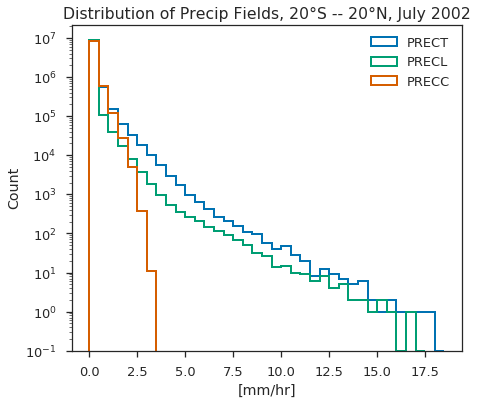

In [5]:
with sns.axes_style('ticks'):
    f, ax = plt.subplots(figsize=(7,6))
    prect.plot.hist(ax=ax, log=True, bins=np.arange(0, prect.values.max().round()+1, 0.5), histtype='step', linewidth=2, label='PRECT')
    precl.plot.hist(ax=ax, log=True, bins=np.arange(0, precl.values.max().round()+1, 0.5), histtype='step', linewidth=2, label='PRECL')
    precc.plot.hist(ax=ax, log=True, bins=np.arange(0, precc.values.max().round()+1, 0.5), histtype='step', linewidth=2, label='PRECC')
    ax.legend()
    ax.set_xlabel('[mm/hr]')
    ax.set_title('Distribution of Precip Fields, 20'+u'\N{DEGREE SIGN}'+'S -- 20'+u'\N{DEGREE SIGN}'+'N, July 2002')

    f.savefig('figures/dist_PREC.png')

Here I inspected histograms excluding zeroes. However, at these scales, only the lowest PRECC bin was very minorly affected.

### Percentile analysis
Here we will investigate the fractional contribution of our more extreme rain events.

#### PRECT

In [6]:
prect_mean = prect.mean().values

prect_90 = np.percentile(prect.values, 90)
prect_90_tot = prect.values[np.where(prect.values > prect_90)].sum() / prect.values.sum()

prect_99 = np.percentile(prect.values, 99)
prect_99_tot = prect.values[np.where(prect.values > prect_99)].sum() / prect.values.sum()

prect_999 = np.percentile(prect.values, 99.9)
prect_999_tot = prect.values[np.where(prect.values > prect_999)].sum() / prect.values.sum()

print('Mean:       ', str(prect_mean))
print('Top 10%:    ', str(prect_90), ' / ', str(prect_90_tot*100), '%')
print('Top 1%:     ', str(prect_99), ' / ', str(prect_99_tot*100), '%')
print('Top 0.1%:   ', str(prect_999), ' / ', str(prect_999_tot*100), '%')

Mean:        0.1625574380159378
Top 10%:     0.470961153507  /  62.6253604889 %
Top 1%:      1.85126574397  /  16.9080749154 %
Top 0.1%:    3.86730749869  /  3.12633775175 %


`np.sort(prect.values.flatten())[int(0.9*prect.values.flatten().size)]` was used to manually verify this was providing the desired statistics. Statistics without zeroes barely increased all of the statistics.

#### PRECL

In [7]:
precl_mean = precl.values.mean()

precl_90 = np.percentile(precl.values, 90)
precl_90_tot = precl.values[np.where(precl.values > precl_90)].sum() / precl.values.sum()

precl_99 = np.percentile(precl.values, 99)
precl_99_tot = precl.values[np.where(precl.values > precl_99)].sum() / precl.values.sum()

precl_999 = np.percentile(precl.values, 99.9)
precl_999_tot = precl.values[np.where(precl.values > precl_999)].sum() / precl.values.sum()

print('Mean:       '+str(precl_mean)+' (including zeroes)')
print('Top 10%:    '+str(precl_90)+' / '+str(precl_90_tot*100)+'%')
print('Top 1%:     '+str(precl_99)+' / '+str(precl_99_tot*100)+'%')
print('Top 0.1%:   '+str(precl_999)+' / '+str(precl_999_tot*100)+'%')

Mean:       0.0333327 (including zeroes)
Top 10%:    0.0133921290748 / 96.5855121613%
Top 1%:     0.871050385833 / 47.1877217293%
Top 0.1%:   2.45659273887 / 10.6929779053%


#### PRECC

In [8]:
precc_mean = precc.values.mean()

precc_90 = np.percentile(precc.values, 90)
precc_90_tot = precc.values[np.where(precc.values > precc_90)].sum() / precc.values.sum()

precc_99 = np.percentile(precc.values, 99)
precc_99_tot = precc.values[np.where(precc.values > precc_99)].sum() / precc.values.sum()

precc_999 = np.percentile(precc.values, 99.9)
precc_999_tot = precc.values[np.where(precc.values > precc_999)].sum() / precc.values.sum()

print('Mean:       '+str(precc_mean)+' (including zeroes)')
print('Top 10%:    '+str(precc_90)+' / '+str(precc_90_tot*100)+'%')
print('Top 1%:     '+str(precc_99)+' / '+str(precc_99_tot*100)+'%')
print('Top 0.1%:   '+str(precc_999)+' / '+str(precc_999_tot*100)+'%')

Mean:       0.129225 (including zeroes)
Top 10%:    0.432635459304 / 58.0126404762%
Top 1%:     1.1716873467 / 11.4397965372%
Top 0.1%:   1.87381699216 / 1.61755047739%


##### Non-zero analysis
Really only showed any difference in PRECC. Excluded elsewhere.

In [9]:
precc_mean = precc.where(precc > 0).mean(skipna=True).values

precc_90 = np.nanpercentile(precc.where(precc > 0).values, 90)
precc_90_tot = precc.values[np.where(precc.values > precc_90)].sum() / precc.values.sum()

precc_99 = np.nanpercentile(precc.where(precc > 0).values, 99)
precc_99_tot = precc.values[np.where(precc.values > precc_99)].sum() / precc.values.sum()

precc_999 = np.nanpercentile(precc.where(precc > 0).values, 99.9)
precc_999_tot = precc.values[np.where(precc.values > precc_999)].sum() / precc.values.sum()

print('Mean:       '+str(precc_mean)+' (including zeroes)')
print('Top 10%:    '+str(precc_90)+' / '+str(precc_90_tot*100)+'%')
print('Top 1%:     '+str(precc_99)+' / '+str(precc_99_tot*100)+'%')
print('Top 0.1%:   '+str(precc_999)+' / '+str(precc_999_tot*100)+'%')

Mean:       0.2570180892944336 (including zeroes)
Top 10%:    0.648538082838 / 37.6708596945%
Top 1%:     1.39715696573 / 6.54872655869%
Top 0.1%:   2.03527082157 / 0.868345517665%


### Maps

#### Initial Maps

In [24]:
print(precc.mean(dim='time').max().values, precl.mean(dim='time').max().values, prect.mean(dim='time').max().values)

1.0581979751586914 1.1759684085845947 1.8855154514312744


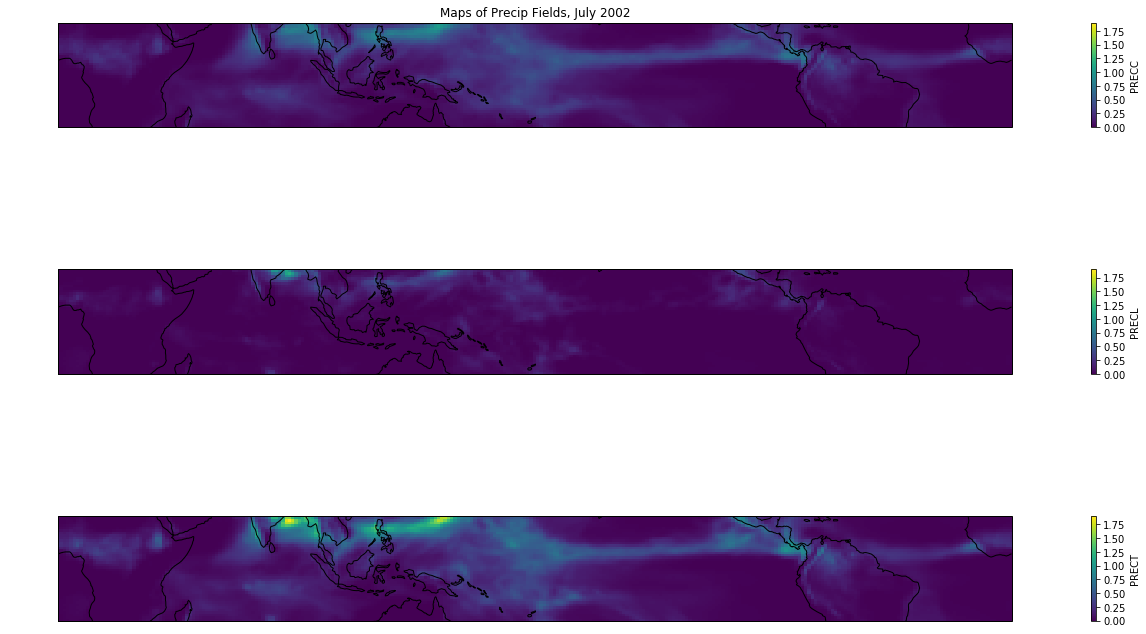

In [67]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, squeeze=True, figsize=(18,12), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
p = precc.mean(dim='time').plot(ax=ax1, transform=ccrs.PlateCarree(), vmax=1.9, cbar_kwargs=dict(shrink=0.3, pad=0.025))#, cmap=sns.color_palette("Greens"))
q = precl.mean(dim='time').plot(ax=ax2, transform=ccrs.PlateCarree(), vmax=1.9, cbar_kwargs=dict(shrink=0.3, pad=0.025))#, cmap=sns.color_palette("Greens"))
r = prect.mean(dim='time').plot(ax=ax3, transform=ccrs.PlateCarree(), vmax=1.9, cbar_kwargs=dict(shrink=0.3, pad=0.025))#, cmap=sns.color_palette("Greens"))

ax1.coastlines()
ax2.coastlines()
ax3.coastlines()

ax1.set_title('Maps of Precip Fields, July 2002')

plt.tight_layout(h_pad=0)

f.savefig('figures/precip_maps.png')

#### Contribution of PRECC to PRECT

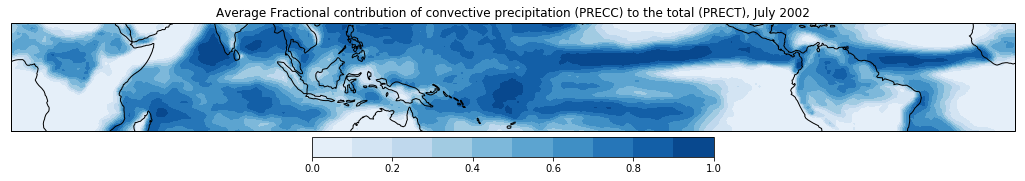

In [70]:
pcfrac = precc.where(prect > 0) / prect.where(prect > 0)

f, ax = plt.subplots(figsize=(18,4), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
p = pcfrac.mean(dim='time').plot.contourf(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, levels=11, colors=sns.color_palette("Blues", 10))
ax.coastlines()
cbar = plt.colorbar(p, ax=ax, orientation='horizontal', shrink=0.4, pad=0.025)

ax.set_title('Average Fractional contribution of convective precipitation (PRECC) to the total (PRECT), July 2002')

f.savefig('figures/pcfrac.png')

In [11]:
pcfrac.where(pcfrac > 0.5).notnull().sum().values / pcfrac.notnull().sum().values

/glade/u/home/mcamron/miniconda3/envs/base/lib/python3.6/site-packages/dask/array/core.py:2403: RuntimeWarning: invalid value encountered in greater
  return function(*args2, **kwargs)


0.50899061661863299

#### Locations of high-intensity events

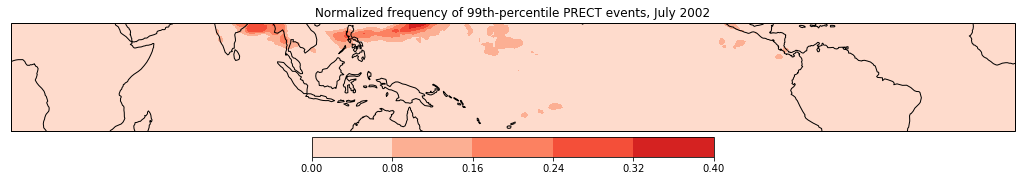

In [69]:
ptfreq = prect.where(prect > prect_99).notnull().sum(dim='time') / prect.time.size
f, ax = plt.subplots(figsize=(18,4), subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
p = ptfreq.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False, colors=sns.color_palette("Reds"))
ax.coastlines()
cbar = plt.colorbar(p, ax=ax, orientation='horizontal', shrink=0.4, pad=0.025)

ax.set_title('Normalized frequency of 99th-percentile PRECT events, July 2002')

f.savefig('figures/pcfreq.png')